In [27]:
# Import necassary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
#Load dataset
df_inquiries = pd.read_csv('/Users/petermcisaac/neue-fische-traum/traum-preis/datasets/inquiries_20210707.csv')

# Set time and date

In [9]:
df_inquiries['date'] = pd.to_datetime(df_inquiries['date'])
df_inquiries['time'] = pd.to_datetime(df_inquiries['time'])
df_inquiries['arrival_date'] = pd.to_datetime(df_inquiries['arrival_date'])
df_inquiries['departure_date'] = pd.to_datetime(df_inquiries['departure_date'])

## Look into data

In [11]:
df_inquiries.head(2)


,listing_id,title,date,time,adult_count,children_count,pets_count,arrival_date,departure_date,inquiry_price
0,c47741c3-2327-596e-89bc-5fcec81c9ee7,Anfrage,2019-01-01,2021-07-09 00:04:56,2.0,0.0,0.0,2019-06-30,2019-07-13,0.0
1,07ab2635-ca78-516a-bbfb-5d1dbf8b9a5a,Anfrage,2019-01-01,2021-07-09 00:05:36,6.0,2.0,0.0,2019-07-24,2019-07-31,1840.0


In [13]:
df_inquiries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4018005 entries, 0 to 4018004
Data columns (total 10 columns):
 #   Column          Dtype         
---  ------          -----         
 0   listing_id      object        
 1   title           object        
 2   date            datetime64[ns]
 3   time            datetime64[ns]
 4   adult_count     float64       
 5   children_count  float64       
 6   pets_count      float64       
 7   arrival_date    datetime64[ns]
 8   departure_date  datetime64[ns]
 9   inquiry_price   float64       
dtypes: datetime64[ns](4), float64(4), object(2)
memory usage: 306.5+ MB


In [14]:
df_inquiries.describe().round(3)

,adult_count,children_count,pets_count,inquiry_price
count,4012271.000,4012271.000,4012271.000,3424008.000
mean,3.137,0.548,0.208,887.142
std,1.987,1.068,0.586,2301.717
min,0.000,0.000,0.000,-3.380
25%,2.000,0.000,0.000,382.000
50%,2.000,0.000,0.000,646.000
75%,4.000,1.000,0.000,1090.000
max,82.000,80.000,500.000,1792331.430


In [15]:
df_inquiries.isna().sum()

listing_id             0
title                  0
date                   0
time                   0
adult_count         5734
children_count      5734
pets_count          5734
arrival_date           0
departure_date         0
inquiry_price     593997
dtype: int64

In [16]:
df_inquiries.nunique()

listing_id        110746
title                  4
date                 731
time               82630
adult_count           52
children_count        33
pets_count            14
arrival_date        1344
departure_date      1352
inquiry_price      89049
dtype: int64

Dataset Inquiries: check to see what these values look like
- adult_count max
- children_count max
- pets_count max
- inquiries_prices --> everything (NA, Zeros, min, max)
- convert some columns to date time
- duplicate rows

In [18]:
df_inquiries.title.unique()

array(['Anfrage', 'Direktbuchen', 'Externe Buchung',
       'Verbindliche Anfrage'], dtype=object)

In [19]:
df_inquiries['adult_count'].sort_values().max()

82.0

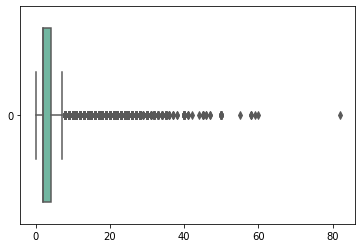

In [36]:
ax = sns.boxplot(data=df_inquiries['adult_count'], orient="h", palette="Set2")

In [20]:
df_inquiries['children_count'].sort_values().max()

80.0

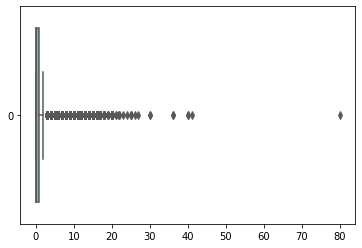

In [37]:
ax = sns.boxplot(data=df_inquiries['children_count'], orient="h", palette="Set2")

In [21]:
df_inquiries['pets_count'].sort_values().max()

500.0

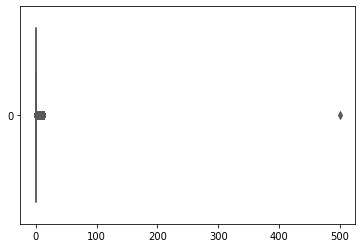

In [39]:
ax = sns.boxplot(data=df_inquiries['pets_count'], orient="h", palette="Set2")

# all these values indicate outliers, even if they are accurate

In [30]:
# number of missing for inquiries_price is high


df_inquiries['inquiry_price'].isna()

0          False
1          False
2          False
3          False
4          False
           ...  
4018000    False
4018001    False
4018002    False
4018003    False
4018004    False
Name: inquiry_price, Length: 4018005, dtype: bool

In [31]:
# the values in inquiry_price

df_inquiries['inquiry_price'].value_counts()

0.000000       120344
420.000000      21403
560.000000      19841
350.000000      19451
490.000000      19222
                ...  
464.571430          1
1070.968928         1
885.860000          1
1094.614997         1
3325.780000         1
Name: inquiry_price, Length: 89049, dtype: int64

In [32]:
df_inquiries['inquiry_price'].sort_values().max()

1792331.43

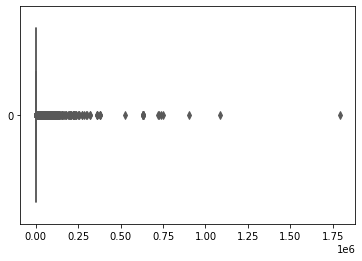

In [34]:
ax = sns.boxplot(data=df_inquiries['inquiry_price'], orient="h", palette="Set2")

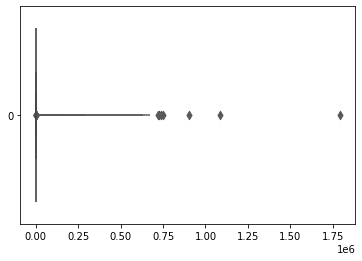

In [35]:
ax = sns.boxenplot(data=df_inquiries['inquiry_price'], orient="h", palette="Set2")

# we see ranges with outliers, these should be removed for all these variables